In this we the Transfer learning using the Feature extraction 

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [6]:
# now we train the Dense and fully connected layer 

model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))   # output for the classificaiton


In [7]:
# in this line we give the command that conv_base (Freeze) has trainable = false no need to train
conv_base.trainable = False

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
from tensorflow.keras.utils import array_to_img, img_to_array, load_img


In [10]:
# data agumentation

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
# during Data Agumentation --> we use to "fit_generator" to train the model

history = model.fit_generator(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

<ipython-input-12-7cdaff50df4a>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 186s 289ms/step - loss: 0.3035 - accuracy: 0.8680 - val_loss: 0.2169 - val_accuracy: 0.9062
Epoch 2/10
625/625 [==============================] - 176s 281ms/step - loss: 0.2360 - accuracy: 0.8993 - val_loss: 0.2128 - val_accuracy: 0.9088
Epoch 3/10
625/625 [==============================] - 175s 280ms/step - loss: 0.2197 - accuracy: 0.9053 - val_loss: 0.2110 - val_accuracy: 0.9072
Epoch 4/10
625/625 [==============================] - 174s 279ms/step - loss: 0.2121 - accuracy: 0.9100 - val_loss: 0.1959 - val_accuracy: 0.9170
Epoch 5/10
625/625 [==============================] - 174s 278ms/step - loss: 0.1952 - accuracy: 0.9184 - val_loss: 0.1934 - val_accuracy: 0.9192
Epoch 6/10
625/625 [==============================] - 173s 276ms/step - loss: 0.1902 - accuracy: 0.9196 - val_loss: 0.1888 - val_accuracy: 0.9194
Epoch 7/10
625/625 [==============================] - 174s 278ms/step - loss: 0.1746 - accuracy: 0.9276 - val_loss: 0.1902 -

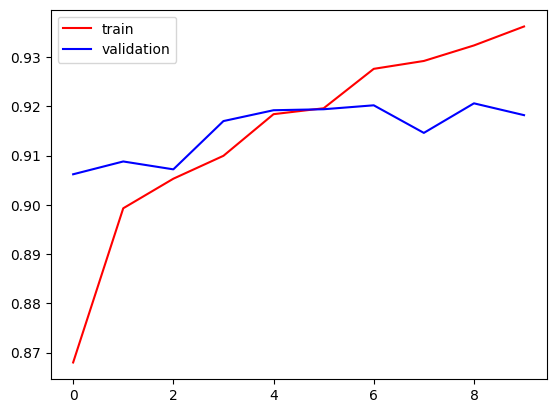

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

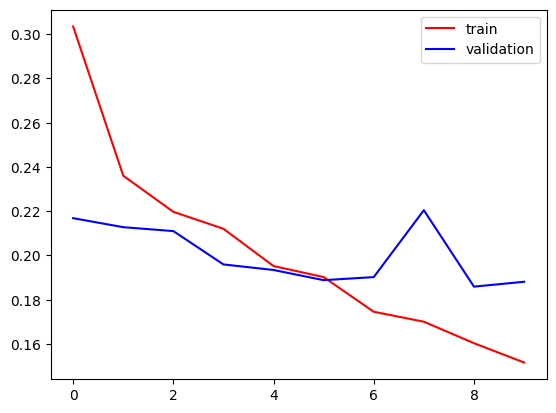

In [15]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()